In [841]:
# **1. Introduction and Problem Statement**
#- With the large number of Telecom Players in the market today, it has been very tough for telecom players to hold customers back from moving to cheaper data plans.  /
#<center><img src="https://miro.medium.com/max/1280/1*9kACduxnce_JdTrftM_bsA.gif"></center>
#- ABC Inc. till now  have been using traditional ways which now have become a problem to handle due to human interventions.
#They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services. 


In [842]:
## 1. Problem Statement
## The company suffers from the following problems:

##Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
##They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
##It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.
### In return, they have decided to find a more optimal way and hired a team of data scientists to solve this problem.

In [843]:
# **3. Installing & Importing Libraries**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [844]:
data = pd.read_csv("C:\\Users\\Avinab\\Desktop\\Saranya\\Python Notebooks\\Telecom-Churn\\Churn_train.csv")
data.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5846-ABOBJ,Male,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.45,1730.65,No
96,3454-JFUBC,Male,1,No,No,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.00,1396,No
97,2243-FNMMI,Male,0,No,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,415.4,No
98,2360-RDGRO,Male,0,Yes,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.25,6812.95,No


In [845]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [846]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [847]:
data['InternetService'].nunique()

3

In [848]:
data['InternetService'].unique()

array(['No', 'DSL', 'Fiber optic'], dtype=object)

In [849]:
data['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [850]:
data['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [851]:
data['OnlineSecurity'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [852]:
data['OnlineBackup'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [853]:
data['DeviceProtection'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [854]:
data['TechSupport'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [855]:
data['StreamingTV'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [856]:
data['StreamingMovies'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [857]:
data['Contract'].unique()

array(['Two year', 'One year', 'Month-to-month'], dtype=object)

In [858]:
data['PaperlessBilling'].unique()

array(['No', 'Yes'], dtype=object)

In [859]:
data['PaymentMethod'].unique()

array(['Mailed check', 'Credit card (automatic)',
       'Bank transfer (automatic)', 'Electronic check'], dtype=object)

In [860]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [861]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-LKXBR,Male,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.6,Yes
5630,3507-GASNP,Male,0,No,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.9,No
5631,8868-WOZGU,Male,0,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.5,Yes
5632,1251-KRREG,Male,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,Yes


In [862]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


In [863]:
### data for continuous variables is more or less normalized ###

In [864]:
### EDA ###

<AxesSubplot:xlabel='gender'>

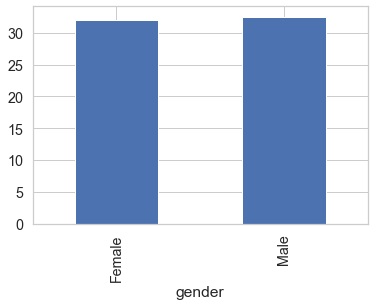

In [865]:
data.groupby(['gender'])['tenure'].mean().plot(kind = 'bar')

In [866]:
### Males have a Slightly higher tenure than females ###

In [867]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


In [868]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<AxesSubplot:xlabel='gender,InternetService'>

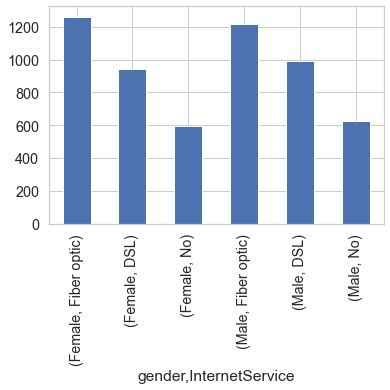

In [869]:
data.groupby(['gender'])['InternetService'].value_counts().plot(kind = 'bar')

In [870]:
data['SeniorCitizen'].nunique()

2

<AxesSubplot:xlabel='SeniorCitizen,InternetService'>

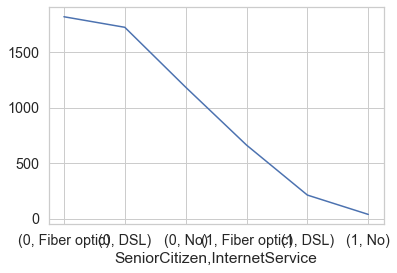

In [871]:
data.groupby(['SeniorCitizen'])['InternetService'].value_counts().plot(kind = 'line')

#### Both Senior, and non-senior Citizens use Fibre Optic Cables the most.


<AxesSubplot:xlabel='gender'>

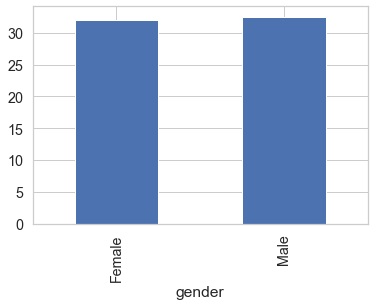

In [872]:
data.groupby(['gender'])['tenure'].mean().plot(kind = 'bar')

### Both males and females have spent similar duration with the company

In [962]:
max_Monthlycharges = data['MonthlyCharges'].max()
max_Monthlycharges

118.65

<AxesSubplot:xlabel='gender'>

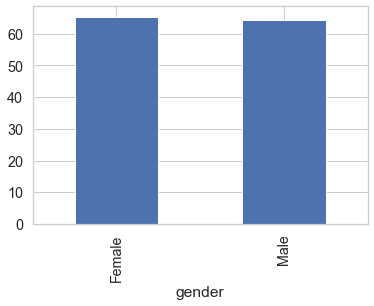

In [873]:
data.groupby(['gender'])['MonthlyCharges'].mean().plot(kind = 'bar')

In [874]:
data.groupby(['gender'])['Churn'].value_counts()

### Females churn more than males.

gender  Churn
Female  No       2022
        Yes       774
Male    No       2091
        Yes       747
Name: Churn, dtype: int64

In [875]:
data.groupby(['gender'])['Partner'].value_counts()

gender  Partner
Female  No         1448
        Yes        1348
Male    No         1484
        Yes        1354
Name: Partner, dtype: int64

In [876]:
data.groupby(['gender'])['Dependents'].value_counts()

gender  Dependents
Female  No            1986
        Yes            810
Male    No            1982
        Yes            856
Name: Dependents, dtype: int64

In [877]:
### Males have higher number of partners and dependents.

In [878]:
cat_cols = ['MultipleLines','OnlineSecurity','InternetService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
cat_cols

['MultipleLines',
 'OnlineSecurity',
 'InternetService',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [879]:
import seaborn as sns
sns.set (style = 'whitegrid' , font_scale = 1.3 , color_codes = True)

In [880]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<AxesSubplot:xlabel='Contract', ylabel='count'>

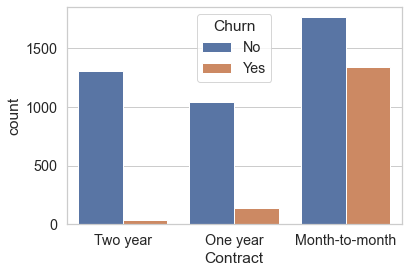

In [881]:
 sns.countplot(x='Contract',  hue='Churn', data=data)
### Highest churn rate is observerd for contracts on a mmonth-to-month basis.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

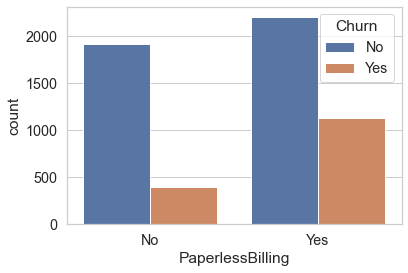

In [882]:
sns.countplot(x='PaperlessBilling', hue ='Churn', data=data)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

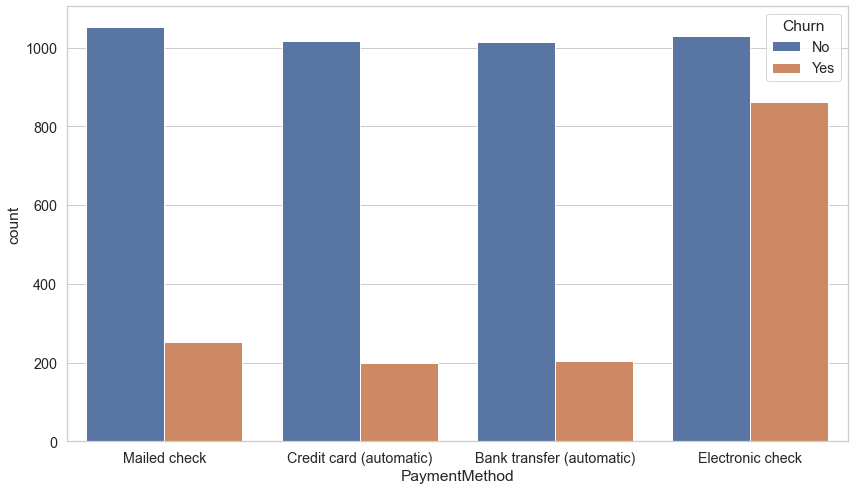

In [883]:
plt.figure(figsize=(14,8))
sns.countplot(x='PaymentMethod', hue ='Churn', data=data)

### Highest Churn rate for Electronic checks.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

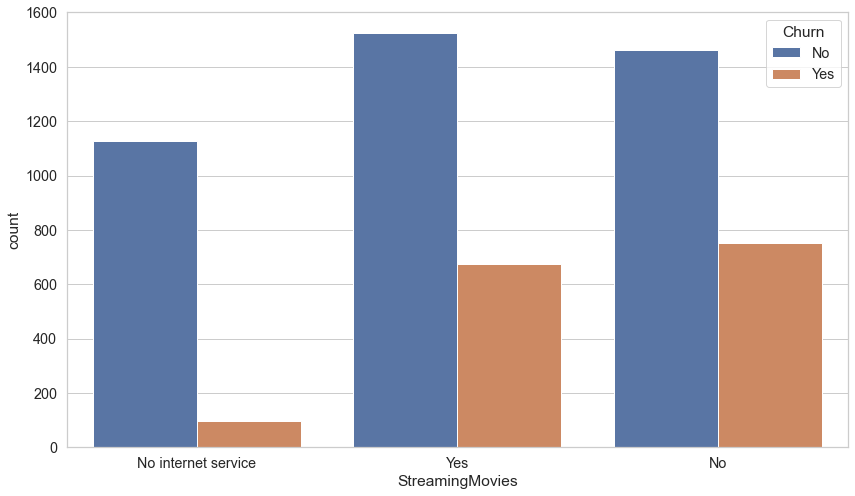

In [884]:
plt.figure(figsize=(14,8))
sns.countplot(x='StreamingMovies', hue ='Churn', data=data)

### Streaming movies does not have much impact on Churn rate.

In [885]:
### Encoding categorical variables to continuous variables
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_with_dummies.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,19.70,258.35,...,0,1,0,1,0,0,1,0,0,1
1,6261-RCVNS,Female,0,No,No,42,Yes,No,73.90,3160.55,...,1,0,0,0,1,1,0,1,0,0
2,2176-OSJUV,Male,0,Yes,No,71,Yes,No,65.15,4681.75,...,1,0,0,0,0,0,1,0,0,0
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,No,85.45,6300.85,...,1,0,1,0,1,1,0,0,1,0
4,2364-UFROM,Male,0,No,No,30,Yes,No,70.40,2044.75,...,1,0,1,0,0,1,0,0,1,0


In [886]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'gender','Partner','Dependents','PhoneService','PaperlessBilling'. 
data_with_dummies['gender']= label_encoder.fit_transform(data_with_dummies['gender']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5442-PPTJY       1              0     Yes        Yes      12          Yes   
1  6261-RCVNS       0              0      No         No      42          Yes   
2  2176-OSJUV       1              0     Yes         No      71          Yes   
3  6161-ERDGD       1              0     Yes        Yes      71          Yes   
4  2364-UFROM       1              0      No         No      30          Yes   

  PaperlessBilling  MonthlyCharges TotalCharges  ... TechSupport_Yes  \
0               No           19.70       258.35  ...               0   
1               No           73.90      3160.55  ...               1   
2               No           65.15      4681.75  ...               1   
3               No           85.45      6300.85  ...               1   
4               No           70.40      2044.75  ...               1   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                              

In [887]:
data_with_dummies['Partner']= label_encoder.fit_transform(data_with_dummies['Partner']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen  Partner Dependents  tenure PhoneService  \
0  5442-PPTJY       1              0        1        Yes      12          Yes   
1  6261-RCVNS       0              0        0         No      42          Yes   
2  2176-OSJUV       1              0        1         No      71          Yes   
3  6161-ERDGD       1              0        1        Yes      71          Yes   
4  2364-UFROM       1              0        0         No      30          Yes   

  PaperlessBilling  MonthlyCharges TotalCharges  ... TechSupport_Yes  \
0               No           19.70       258.35  ...               0   
1               No           73.90      3160.55  ...               1   
2               No           65.15      4681.75  ...               1   
3               No           85.45      6300.85  ...               1   
4               No           70.40      2044.75  ...               1   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                        

In [888]:
data_with_dummies['Dependents']= label_encoder.fit_transform(data_with_dummies['Dependents']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5442-PPTJY       1              0        1           1      12   
1  6261-RCVNS       0              0        0           0      42   
2  2176-OSJUV       1              0        1           0      71   
3  6161-ERDGD       1              0        1           1      71   
4  2364-UFROM       1              0        0           0      30   

  PhoneService PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0          Yes               No           19.70       258.35  ...   
1          Yes               No           73.90      3160.55  ...   
2          Yes               No           65.15      4681.75  ...   
3          Yes               No           85.45      6300.85  ...   
4          Yes               No           70.40      2044.75  ...   

  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0               0                                1                0   
1               1           

In [889]:
data_with_dummies['PhoneService']= label_encoder.fit_transform(data_with_dummies['PhoneService']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5442-PPTJY       1              0        1           1      12   
1  6261-RCVNS       0              0        0           0      42   
2  2176-OSJUV       1              0        1           0      71   
3  6161-ERDGD       1              0        1           1      71   
4  2364-UFROM       1              0        0           0      30   

   PhoneService PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             1               No           19.70       258.35  ...   
1             1               No           73.90      3160.55  ...   
2             1               No           65.15      4681.75  ...   
3             1               No           85.45      6300.85  ...   
4             1               No           70.40      2044.75  ...   

  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0               0                                1                0   
1               1     

In [890]:
data_with_dummies['Partner']= label_encoder.fit_transform(data_with_dummies['Partner']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5442-PPTJY       1              0        1           1      12   
1  6261-RCVNS       0              0        0           0      42   
2  2176-OSJUV       1              0        1           0      71   
3  6161-ERDGD       1              0        1           1      71   
4  2364-UFROM       1              0        0           0      30   

   PhoneService PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             1               No           19.70       258.35  ...   
1             1               No           73.90      3160.55  ...   
2             1               No           65.15      4681.75  ...   
3             1               No           85.45      6300.85  ...   
4             1               No           70.40      2044.75  ...   

  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0               0                                1                0   
1               1     

In [891]:
data_with_dummies['Dependents']= label_encoder.fit_transform(data_with_dummies['Dependents']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5442-PPTJY       1              0        1           1      12   
1  6261-RCVNS       0              0        0           0      42   
2  2176-OSJUV       1              0        1           0      71   
3  6161-ERDGD       1              0        1           1      71   
4  2364-UFROM       1              0        0           0      30   

   PhoneService PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             1               No           19.70       258.35  ...   
1             1               No           73.90      3160.55  ...   
2             1               No           65.15      4681.75  ...   
3             1               No           85.45      6300.85  ...   
4             1               No           70.40      2044.75  ...   

  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0               0                                1                0   
1               1     

In [892]:
data_with_dummies['PaperlessBilling']= label_encoder.fit_transform(data_with_dummies['PaperlessBilling']) 
print(data_with_dummies.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5442-PPTJY       1              0        1           1      12   
1  6261-RCVNS       0              0        0           0      42   
2  2176-OSJUV       1              0        1           0      71   
3  6161-ERDGD       1              0        1           1      71   
4  2364-UFROM       1              0        0           0      30   

   PhoneService  PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             1                 0           19.70       258.35  ...   
1             1                 0           73.90      3160.55  ...   
2             1                 0           65.15      4681.75  ...   
3             1                 0           85.45      6300.85  ...   
4             1                 0           70.40      2044.75  ...   

  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0               0                                1                0   
1               

In [893]:
data_with_dummies.drop(['customerID'], axis=1, inplace = True)

In [894]:
data_with_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,12,1,0,19.70,258.35,No,...,0,1,0,1,0,0,1,0,0,1
1,0,0,0,0,42,1,0,73.90,3160.55,Yes,...,1,0,0,0,1,1,0,1,0,0
2,1,0,1,0,71,1,0,65.15,4681.75,No,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,1,71,1,0,85.45,6300.85,No,...,1,0,1,0,1,1,0,0,1,0
4,1,0,0,0,30,1,0,70.40,2044.75,No,...,1,0,1,0,0,1,0,0,1,0


In [895]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int32  
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   int64  
 5   PhoneService                           5634 non-null   int32  
 6   PaperlessBilling                       5634 non-null   int32  
 7   MonthlyCharges                         5634 non-null   float64
 8   TotalCharges                           5634 non-null   object 
 9   Churn                                  5634 non-null   object 
 10  MultipleLines_No phone service         5634 non-null   uint8  
 11  Mult

In [896]:
data_with_dummies['Churn']= label_encoder.fit_transform(data_with_dummies['Churn']) 
print(data_with_dummies.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      12             1   
1       0              0        0           0      42             1   
2       1              0        1           0      71             1   
3       1              0        1           1      71             1   
4       1              0        0           0      30             1   

   PaperlessBilling  MonthlyCharges TotalCharges  Churn  ...  TechSupport_Yes  \
0                 0           19.70       258.35      0  ...                0   
1                 0           73.90      3160.55      1  ...                1   
2                 0           65.15      4681.75      0  ...                1   
3                 0           85.45      6300.85      0  ...                1   
4                 0           70.40      2044.75      0  ...                1   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                              

In [897]:
data_with_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,12,1,0,19.70,258.35,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,0,0,42,1,0,73.90,3160.55,1,...,1,0,0,0,1,1,0,1,0,0
2,1,0,1,0,71,1,0,65.15,4681.75,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,1,71,1,0,85.45,6300.85,0,...,1,0,1,0,1,1,0,0,1,0
4,1,0,0,0,30,1,0,70.40,2044.75,0,...,1,0,1,0,0,1,0,0,1,0


In [898]:
data_with_dummies.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.000579,-0.005025,0.013061,0.008909,-0.013742,-0.009294,-0.017380,-0.015329,0.013742,...,0.006978,0.009434,0.000309,0.009434,-0.000873,0.011825,-0.000841,-0.009520,-0.004176,0.013157
SeniorCitizen,0.000579,1.000000,0.012169,-0.208738,0.023443,0.013908,0.155178,0.225234,0.141966,-0.013908,...,-0.057556,-0.186722,0.107189,-0.186722,0.126309,-0.047261,-0.114828,-0.024592,0.165857,-0.162479
Partner,-0.005025,0.012169,1.000000,0.451545,0.383123,0.010001,-0.005570,0.095449,-0.140414,-0.010001,...,0.122429,-0.003947,0.118839,-0.003947,0.115723,0.067287,0.261282,0.076269,-0.076618,-0.098417
Dependents,0.013061,-0.208738,0.451545,1.000000,0.161319,-0.008210,-0.110715,-0.118445,-0.152236,0.008210,...,0.058656,0.142491,-0.015823,0.142491,-0.037111,0.067064,0.204938,0.054937,-0.148026,0.059100
tenure,0.008909,0.023443,0.383123,0.161319,1.000000,0.004518,0.017574,0.251072,-0.351885,-0.004518,...,0.317655,-0.044362,0.283103,-0.044362,0.286317,0.202476,0.556975,0.227657,-0.208927,-0.230622
PhoneService,-0.013742,0.013908,0.010001,-0.008210,0.004518,1.000000,0.018807,0.247773,0.021163,-1.000000,...,-0.101168,0.172486,-0.022929,0.172486,-0.033674,-0.011547,0.004906,-0.011425,0.007348,-0.004687
PaperlessBilling,-0.009294,0.155178,-0.005570,-0.110715,0.017574,0.018807,1.000000,0.355449,0.184033,-0.018807,...,0.042162,-0.320278,0.234835,-0.320278,0.217580,-0.049648,-0.136494,-0.008214,0.203313,-0.206323
MonthlyCharges,-0.017380,0.225234,0.095449,-0.118445,0.251072,0.247773,0.355449,1.000000,0.196805,-0.247773,...,0.335983,-0.763673,0.628831,-0.763673,0.628915,0.012675,-0.081213,0.034872,0.275569,-0.386024
Churn,-0.015329,0.141966,-0.140414,-0.152236,-0.351885,0.021163,0.184033,0.196805,1.000000,-0.021163,...,-0.158289,-0.227684,0.058331,-0.227684,0.067259,-0.173767,-0.304726,-0.124893,0.297910,-0.094115
MultipleLines_No phone service,0.013742,-0.013908,-0.010001,0.008210,-0.004518,-1.000000,-0.018807,-0.247773,-0.021163,1.000000,...,0.101168,-0.172486,0.022929,-0.172486,0.033674,0.011547,-0.004906,0.011425,-0.007348,0.004687


In [899]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,6.193449,1.048916,0.137667,-0.230725,-1.764866,-0.590822,-0.737790,-0.947063,0.151330,-0.659732,...,-0.492490,0.925654,-0.007066,-9.769103e-15,1.470994e-16,6.255648e-16,-7.521717e-17,-1.235978e-16,-6.349079e-17,3.892407e-16
1,-1.753667,1.549947,1.235376,-2.189233,2.493547,1.203527,0.643046,0.995724,-0.404005,1.497759,...,-0.242431,-0.074854,-0.034659,8.041441e-14,-1.045030e-15,-1.384785e-15,-2.996953e-16,-2.140206e-16,9.742127e-17,1.822396e-16
2,-1.135658,2.365500,0.732349,-1.352335,-0.357111,-1.802944,-0.167580,-0.927508,1.673675,2.006966,...,0.616020,0.184832,0.002726,3.260080e-15,1.561945e-16,-3.212185e-17,1.435761e-16,-1.231622e-16,-2.348941e-16,3.027615e-16
3,-2.306808,2.440228,0.099678,-0.474757,-1.419338,2.459276,-0.418257,-0.871347,-0.320014,1.798562,...,-0.369528,-0.806511,0.012880,-8.320750e-15,-1.773520e-16,3.501485e-16,-1.780897e-16,-1.647551e-16,-5.223976e-16,1.727599e-16
4,-1.544006,-0.226490,0.816924,-1.522777,0.465589,1.601293,-0.622327,-0.762015,0.082661,2.999577,...,-0.368978,0.258254,0.010315,6.438177e-16,2.848482e-16,-2.476446e-16,7.581041e-16,1.725511e-16,-5.888836e-17,-2.122688e-17


In [900]:
col = list(X_train.columns)
col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [901]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   float64
 1   SeniorCitizen                          5634 non-null   float64
 2   Partner                                5634 non-null   float64
 3   Dependents                             5634 non-null   float64
 4   tenure                                 5634 non-null   float64
 5   PhoneService                           5634 non-null   float64
 6   PaperlessBilling                       5634 non-null   float64
 7   MonthlyCharges                         5634 non-null   float64
 8   MultipleLines_No phone service         5634 non-null   float64
 9   MultipleLines_Yes                      5634 non-null   float64
 10  OnlineSecurity_No internet service     5634 non-null   float64
 11  Onli

In [902]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int32  
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   int64  
 5   PhoneService                           5634 non-null   int32  
 6   PaperlessBilling                       5634 non-null   int32  
 7   MonthlyCharges                         5634 non-null   float64
 8   TotalCharges                           5634 non-null   object 
 9   Churn                                  5634 non-null   int32  
 10  MultipleLines_No phone service         5634 non-null   uint8  
 11  Mult

In [903]:
y = data_with_dummies['Churn']
x = data_with_dummies.drop('Churn', axis=1)
data_with_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,12,1,0,19.70,258.35,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,0,0,42,1,0,73.90,3160.55,1,...,1,0,0,0,1,1,0,1,0,0
2,1,0,1,0,71,1,0,65.15,4681.75,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,1,71,1,0,85.45,6300.85,0,...,1,0,1,0,1,1,0,0,1,0
4,1,0,0,0,30,1,0,70.40,2044.75,0,...,1,0,1,0,0,1,0,0,1,0


In [904]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,12,1,0,19.70,258.35,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,0,0,42,1,0,73.90,3160.55,0,...,1,0,0,0,1,1,0,1,0,0
2,1,0,1,0,71,1,0,65.15,4681.75,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,1,71,1,0,85.45,6300.85,0,...,1,0,1,0,1,1,0,0,1,0
4,1,0,0,0,30,1,0,70.40,2044.75,0,...,1,0,1,0,0,1,0,0,1,0


In [905]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int32

In [906]:
## Converting TotalCharges to Numeric column ###
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'],errors='coerce')
x['TotalCharges'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5629    False
5630    False
5631    False
5632    False
5633    False
Name: TotalCharges, Length: 5634, dtype: bool

In [907]:
### Splitting data into Train, Test, Split sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
319,1,0,1,1,22,1,0,19.95,433.50,0,...,0,1,0,1,0,1,0,0,0,1
2883,0,1,1,0,44,1,0,104.15,4495.65,0,...,1,0,1,0,1,0,0,0,1,0
982,1,0,1,0,13,1,1,65.85,902.25,0,...,0,0,0,0,1,0,0,0,1,0
4808,0,0,0,0,2,1,0,80.75,159.45,0,...,0,0,0,0,1,0,0,0,1,0
5141,1,0,1,0,35,1,1,69.00,2441.70,0,...,1,0,1,0,0,1,0,0,1,0


In [908]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
319,1,0,1,1,22,1,0,19.95,433.50,0,...,0,1,0,1,0,1,0,0,0,1
2883,0,1,1,0,44,1,0,104.15,4495.65,0,...,1,0,1,0,1,0,0,0,1,0
982,1,0,1,0,13,1,1,65.85,902.25,0,...,0,0,0,0,1,0,0,0,1,0
4808,0,0,0,0,2,1,0,80.75,159.45,0,...,0,0,0,0,1,0,0,0,1,0
5141,1,0,1,0,35,1,1,69.00,2441.70,0,...,1,0,1,0,0,1,0,0,1,0


In [909]:
x_train['PaperlessBilling']= label_encoder.fit_transform(x_train['PaperlessBilling']) 
print(x_train.head())
x_test['PaperlessBilling']= label_encoder.fit_transform(x_test['PaperlessBilling'])

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
319        1              0        1           1      22             1   
2883       0              1        1           0      44             1   
982        1              0        1           0      13             1   
4808       0              0        0           0       2             1   
5141       1              0        1           0      35             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
319                  0           19.95        433.50   
2883                 0          104.15       4495.65   
982                  1           65.85        902.25   
4808                 0           80.75        159.45   
5141                 1           69.00       2441.70   

      MultipleLines_No phone service  ...  TechSupport_Yes  \
319                                0  ...                0   
2883                               0  ...                1   
982                             

In [910]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4719,1,1,1,1,68,1,0,19.50,1193.55,0,...,0,1,0,1,0,1,0,0,0,0
1024,0,0,1,1,1,1,1,20.50,20.50,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,30,1,1,97.00,3021.30,0,...,0,0,1,0,1,1,0,0,0,0
2390,0,0,0,0,1,1,1,79.55,79.55,0,...,0,0,0,0,0,0,0,0,0,1
670,0,0,0,1,22,1,1,20.55,469.85,0,...,0,1,0,1,0,0,0,0,1,0


In [911]:
### Standardizing the X train and X test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[col] = scaler.fit_transform(x_train[col])
x_test[col] = scaler.transform(x_test[col])

In [912]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
319,0.983932,-0.435672,1.052169,1.552169,-0.408685,0.32726,-1.186959,-1.489871,433.50,-0.32726,...,-0.639780,1.905798,-0.785590,1.905798,-0.800437,1.942772,-0.559326,-0.529869,-0.709815,1.821277
2883,-1.016330,2.295306,1.052169,-0.644260,0.482748,0.32726,-1.186959,1.320756,4495.65,-0.32726,...,1.563038,-0.524715,1.272929,-0.524715,1.249318,-0.514728,-0.559326,-0.529869,1.408818,-0.549065
982,0.983932,-0.435672,1.052169,-0.644260,-0.773362,0.32726,0.842489,0.042288,902.25,-0.32726,...,-0.639780,-0.524715,-0.785590,-0.524715,1.249318,-0.514728,-0.559326,-0.529869,1.408818,-0.549065
4808,-1.016330,-0.435672,-0.950418,-0.644260,-1.219078,0.32726,-1.186959,0.539656,159.45,-0.32726,...,-0.639780,-0.524715,-0.785590,-0.524715,1.249318,-0.514728,-0.559326,-0.529869,1.408818,-0.549065
5141,0.983932,-0.435672,1.052169,-0.644260,0.118071,0.32726,0.842489,0.147436,2441.70,-0.32726,...,1.563038,-0.524715,1.272929,-0.524715,-0.800437,1.942772,-0.559326,-0.529869,1.408818,-0.549065


In [913]:
x_train.shape

(4507, 30)

In [914]:
y_train.shape

(4507,)

In [915]:
x_train.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             5
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [916]:
x_train['TotalCharges'] = x_train['TotalCharges'].fillna(x_train['TotalCharges'].mode()[0])

In [917]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=15 ,criterion = "entropy", max_features="auto", min_samples_split=2)
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, random_state=42)

In [918]:
x_test['TotalCharges'] = x_test['TotalCharges'].fillna(x_test['TotalCharges'].mode()[0])

In [919]:
x_test.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [920]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [921]:
y_test.head()

4719    0
1024    1
2446    0
2390    1
670     0
Name: Churn, dtype: int32

In [922]:
y_test.replace('Yes',1, inplace=True) ### The output is in the form of 1's and 0's for y_tes_pred. Hence replacing y_test values similarly

In [923]:
y_test.replace('No',0, inplace=True)

In [924]:
y_test.head()

4719    0
1024    1
2446    0
2390    1
670     0
Name: Churn, dtype: int32

In [925]:
### Model Evaluation ###

In [926]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest Model is:',accuracy_score(y_test, y_test_pred))

Accuracy score for test data with Random Forest Model is: 0.7879325643300799


In [927]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with RF is:\n',confusion_matrix(y_test, y_test_pred))

Confusion matrix for test data with RF is:
 [[715 107]
 [132 173]]


In [928]:
from sklearn.metrics import precision_score
precision_rf = precision_score(y_test,y_test_pred)
precision_rf

0.6178571428571429

In [953]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [954]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with KNN is:',accuracy_score(y_test, y_test_pred))

Accuracy score for test data with KNN is: 0.7506654835847383


In [955]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with KNN is:\n',confusion_matrix(y_test, y_test_pred))

Confusion matrix for test data with KNN is:
 [[775  47]
 [234  71]]


In [956]:
from sklearn.metrics import precision_score
precision_rf = precision_score(y_test,y_test_pred)
precision_rf

0.6016949152542372

In [957]:
from sklearn.metrics import recall_score
print('Recall score for test data using KNN is:',recall_score(y_test,y_test_pred))

Recall score for test data using KNN is: 0.23278688524590163


In [929]:
test = pd.read_csv("C:\\Users\\Avinab\\Desktop\\Saranya\\Python Notebooks\\Telecom-Churn\\Churn_test.csv")
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [930]:
cat_cols = ['MultipleLines','OnlineSecurity','InternetService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
cat_cols
data_with_dummies = pd.get_dummies(test, columns=cat_cols, drop_first=True)
data_with_dummies.head()

# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'gender','Partner','Dependents','PhoneService','PaperlessBilling'. 
data_with_dummies['gender']= label_encoder.fit_transform(data_with_dummies['gender']) 
data_with_dummies['Partner']= label_encoder.fit_transform(data_with_dummies['Partner'])
data_with_dummies['Dependents']= label_encoder.fit_transform(data_with_dummies['Dependents'])
data_with_dummies['PhoneService']= label_encoder.fit_transform(data_with_dummies['PhoneService'])
data_with_dummies['PaperlessBilling']= label_encoder.fit_transform(data_with_dummies['PaperlessBilling']) 
print(data_with_dummies.head())
test= data_with_dummies

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  8879-ZKJOF       0              0        0           0      41   
1  0201-MIBOL       0              1        0           0      66   
2  1600-DILPE       0              0        0           0      12   
3  8601-QACRS       0              0        0           0       5   
4  7919-ZODZZ       0              0        1           1      10   

   PhoneService  PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             1                 1           79.85      3320.75  ...   
1             1                 1          102.40      6471.85  ...   
2             1                 1           45.00       524.35  ...   
3             1                 1           50.60       249.95  ...   
4             1                 1           65.90       660.05  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                1                                0                1   
1             

In [931]:
test['TotalCharges'] = pd.to_numeric(test['TotalCharges'],errors='coerce')
test.info()
test.drop(['customerID'], axis = 1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             1409 non-null   object 
 1   gender                                 1409 non-null   int32  
 2   SeniorCitizen                          1409 non-null   int64  
 3   Partner                                1409 non-null   int32  
 4   Dependents                             1409 non-null   int32  
 5   tenure                                 1409 non-null   int64  
 6   PhoneService                           1409 non-null   int32  
 7   PaperlessBilling                       1409 non-null   int32  
 8   MonthlyCharges                         1409 non-null   float64
 9   TotalCharges                           1406 non-null   float64
 10  MultipleLines_No phone service         1409 non-null   uint8  
 11  Mult

In [932]:
test.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             3
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [933]:
test['TotalCharges'] = test['TotalCharges'].fillna(test['TotalCharges'].mode()[0])
test.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [935]:
test1_pred = clf.predict(test)

In [938]:
test = pd.read_csv("C:\\Users\\Avinab\\Desktop\\Saranya\\Python Notebooks\\Telecom-Churn\\Churn_test.csv")
submission = pd.DataFrame(np.array(test['customerID']),columns=['NO'])
submission['prediction'] = test1_pred
submission.head()

,NO,prediction
0,8879-ZKJOF,0
1,0201-MIBOL,0
2,1600-DILPE,0
3,8601-QACRS,0
4,7919-ZODZZ,0


In [963]:
submission.to_csv("sample_submission.csv", index = False, header=False)

In [ ]:
### Using PCA to reduce the number of components ###

In [742]:
from sklearn.decomposition import PCA
pca = PCA()
x_train[col] = pca.fit_transform(x_train[col])
x_test[col] = pca.transform(x_test[col])

In [743]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.33578207e-01, 1.06725355e-01, 9.28044669e-02, 4.81559704e-02,
       4.35287167e-02, 4.23516634e-02, 3.84179653e-02, 3.46005213e-02,
       3.26709844e-02, 3.04030840e-02, 2.77151830e-02, 2.43938217e-02,
       2.31132475e-02, 2.14459859e-02, 2.07811020e-02, 1.72338115e-02,
       1.55684559e-02, 1.53201426e-02, 1.50178706e-02, 9.10662772e-03,
       7.03645981e-03, 3.03578371e-05, 1.86114913e-32, 1.38830592e-33,
       1.38830592e-33, 1.38830592e-33, 1.38830592e-33, 1.38830592e-33,
       1.38830592e-33])

In [744]:
np.sum(explained_variance)

1.0

In [745]:
components = len(explained_variance)
components

29

In [746]:
np.sum(explained_variance[:2])

0.44030356172320456

In [747]:
np.sum(explained_variance[:3])

0.5331080286660717

In [748]:
np.sum(explained_variance[:4])

0.5812639990398135

In [749]:
np.sum(explained_variance[:8])

0.7401628656916897

In [750]:
np.sum(explained_variance[:9])

0.7728338500826101

In [751]:
np.sum(explained_variance[:10])

0.8032369340726433

In [752]:
np.sum(explained_variance[:12])

0.8553459387412432

In [753]:
np.sum(explained_variance[:15])

0.9206862740796262

In [754]:
np.sum(explained_variance[16:])

0.06207991446431398

In [755]:
np.sum(explained_variance[:18])

0.9688086840298741

In [756]:
np.sum(explained_variance[:27])

1.0

In [793]:
### PCA considering the First 18 components
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 18)
x_train2 = pca3.fit_transform(x_train[col])
x_test2 = pca3.transform(x_test[col])

In [794]:
x_train2

array([[-2.75520667,  1.13557628, -1.344517  , ..., -0.27135305,
         0.24235505,  0.15076051],
       [-1.47201541, -1.15917747,  3.75606617, ..., -0.48606748,
         0.14906489, -0.2628707 ],
       [-0.32142241, -1.87339274,  4.70577868, ..., -0.48005215,
        -0.60502915, -0.06216262],
       ...,
       [-1.25840131,  2.82918977,  1.35694324, ...,  0.46431902,
         0.46040951,  1.6515994 ],
       [-2.99339532,  2.30384422, -1.22384209, ...,  0.11497662,
         0.04390693,  0.40233008],
       [-0.73437855, -0.15236527, -0.61540125, ..., -0.57323651,
        -0.25044033,  0.66374814]])

In [795]:
x_test2

array([[-2.13827051,  2.51739511, -0.17184892, ...,  1.75145196,
        -0.13928706,  0.01775244],
       [-1.10163962, -3.30480966, -1.19248909, ...,  0.01712881,
        -0.07191628,  0.36328628],
       [-2.8700828 ,  2.0205816 , -0.42711202, ...,  1.22591057,
        -0.35313556, -0.29027538],
       ...,
       [ 5.23192855,  0.10276443, -0.88316896, ...,  0.73840419,
         0.07833456, -0.42148954],
       [ 0.23860816, -2.64721864,  0.648709  , ...,  0.3079101 ,
         1.16712502,  0.05469797],
       [-1.80967677,  2.56560735,  4.09446501, ..., -0.06372084,
         0.71712864,  0.23442103]])

In [796]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(x_train2,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [797]:
x_test2

array([[-2.13827051,  2.51739511, -0.17184892, ...,  1.75145196,
        -0.13928706,  0.01775244],
       [-1.10163962, -3.30480966, -1.19248909, ...,  0.01712881,
        -0.07191628,  0.36328628],
       [-2.8700828 ,  2.0205816 , -0.42711202, ...,  1.22591057,
        -0.35313556, -0.29027538],
       ...,
       [ 5.23192855,  0.10276443, -0.88316896, ...,  0.73840419,
         0.07833456, -0.42148954],
       [ 0.23860816, -2.64721864,  0.648709  , ...,  0.3079101 ,
         1.16712502,  0.05469797],
       [-1.80967677,  2.56560735,  4.09446501, ..., -0.06372084,
         0.71712864,  0.23442103]])

In [798]:
y_train_pred = model.predict(x_train2)
y_test_pred = model.predict(x_test2)

In [799]:
y_test.replace(1,'Yes',inplace=True)
y_test.replace(0,'No',inplace=True)
y_test

1056     No
325     Yes
5022     No
4824     No
186      No
       ... 
250      No
2380    Yes
2002     No
881     Yes
5586     No
Name: Churn, Length: 1127, dtype: object

In [800]:
y_test_pred

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [801]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Decision Tree Classifier Model is:',accuracy_score(y_test, y_test_pred))
#print('Accuracy score for test data with Logistic Regression is:',accuracy_score(y_test, prediction_lr))
#print('Accuracy score for test data with Decision Tree is:',accuracy_score(y_test, prediction_dt))

Accuracy score for test data with Decision Tree Classifier Model is: 0.7267080745341615


In [802]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with DT is:\n',confusion_matrix(y_test, y_test_pred))

Confusion matrix for test data with DT is:
 [[678 162]
 [146 141]]


In [776]:
from sklearn.metrics import classification_report 
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      3273
         Yes       0.99      1.00      1.00      1234

    accuracy                           1.00      4507
   macro avg       1.00      1.00      1.00      4507
weighted avg       1.00      1.00      1.00      4507

                    Testing Report           
              precision    recall  f1-score   support

          No       0.82      0.78      0.80       840
         Yes       0.44      0.50      0.47       287

    accuracy                           0.71      1127
   macro avg       0.63      0.64      0.63      1127
weighted avg       0.72      0.71      0.71      1127



In [803]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=15 ,criterion = "entropy", max_features="auto", min_samples_split=2)
clf.fit(x_train2, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, random_state=42)

In [804]:
y_train_pred = clf.predict(x_train2)
y_test_pred = clf.predict(x_test2)

In [805]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest Model is:',accuracy_score(y_test, y_test_pred))

Accuracy score for test data with Random Forest Model is: 0.7684117125110914


In [806]:
from sklearn.metrics import classification_report 
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

          No       1.00      0.97      0.98      3273
         Yes       0.92      1.00      0.96      1234

    accuracy                           0.98      4507
   macro avg       0.96      0.98      0.97      4507
weighted avg       0.98      0.98      0.98      4507

                    Testing Report           
              precision    recall  f1-score   support

          No       0.85      0.84      0.84       840
         Yes       0.54      0.55      0.55       287

    accuracy                           0.77      1127
   macro avg       0.70      0.70      0.70      1127
weighted avg       0.77      0.77      0.77      1127



In [ ]:
### We can see that accuracy score has increased for Random Forest Classifier ###

In [807]:
#Using K Neighbours Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

#Train the model using the training sets
knn.fit(x_train2, y_train)

#Predict the response for test dataset
y_train_pred = knn.predict(x_train2)
y_test_pred = knn.predict(x_test2)

In [808]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest Model is:',accuracy_score(y_test, y_test_pred))

Accuracy score for test data with Random Forest Model is: 0.7648624667258208


In [809]:
from sklearn.metrics import classification_report 
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      3273
         Yes       0.64      0.54      0.59      1234

    accuracy                           0.79      4507
   macro avg       0.74      0.71      0.72      4507
weighted avg       0.78      0.79      0.79      4507

                    Testing Report           
              precision    recall  f1-score   support

          No       0.84      0.85      0.84       840
         Yes       0.54      0.53      0.53       287

    accuracy                           0.76      1127
   macro avg       0.69      0.69      0.69      1127
weighted avg       0.76      0.76      0.76      1127

